In [3]:
#create a function to pull in data from dropbox 
#import all necessary libraries

import pandas as pd
import numpy as np
# from dotenv import load_dotenv
# from dotenv import find_dotenv
import os
from pathlib import Path
import requests
import pandas as pd
# import dropbox
# from dropbox.exceptions import AuthError



In [4]:
#get .env variables

load_dotenv()


#set up the path to the .env file
env_path = Path('.') / '.env'
load_dotenv(dotenv_path=env_path)

#get api token from .env file
link = os.getenv("api_box")
key= os.getenv("ak")
sec=os.getenv("as")

In [66]:
#set up dropbox
dbx = dropbox.Dropbox(key)

#set up the path to the file in dropbox
path = '/test.csv'


In [67]:
#define a function using oauth2 to authenticate with dropbox
def dropbox_list_files(path):
    """Return a Pandas dataframe of files in a given Dropbox folder path in the Apps directory.
    """

    dbx = dropbox_connect()

    try:
        files = dbx.files_list_folder(path).entries
        files_list = []
        for file in files:
            if isinstance(file, dropbox.files.FileMetadata):
                metadata = {
                    'name': file.name,
                    'path_display': file.path_display,
                    'client_modified': file.client_modified,
                    'server_modified': file.server_modified
                }
                files_list.append(metadata)

        df = pd.DataFrame.from_records(files_list)
        return df.sort_values(by='server_modified', ascending=False)

    except Exception as e:
        print('Error getting list of files from Dropbox: ' + str(e))



In [68]:
dropbox_list_files('/Apps/OBDLink/CsvLogs/WVGEF9BP9GD001746')

Unable to refresh access token without                 refresh token and app key


Error getting list of files from Dropbox: AuthError('9666394b88634c53b68381cc3860308b', AuthError('expired_access_token', None))


In [34]:
#verify dropbox connection works

dbx_link.users_get_current_account()





Unable to refresh access token without                 refresh token and app key


AuthError: AuthError('5e16039c8f9f4501925ac7254cc24709', AuthError('expired_access_token', None))

In [4]:
'/Apps/OBDLink/CsvLogs/WVGEF9BP9GD001746'


In [4]:
#import csv from path
#drop first row and column
df1 = pd.read_csv('CSVLog_20221130_091051.csv', skiprows=1)


In [5]:
#drop first column
df1_col=df1.iloc[:,1:]
df=df1_col

In [6]:
df.head()

,Latitude (deg),Longitude (deg),Vehicle speed (MPH),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Accel X (ft/s²),...,Average Trip CO2 Rate (lb/mile),Max Speed (MPH),Seconds Idling (sec),Idling Count,Hard Accel Count,Hard Brake Count,Trip Duration (min),Trip Fuel Economy (MPG),Trip Fuel (gal),Trip Distance (miles)
0,29.56902,-95.21054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,29.56902,-95.21054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.294891,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,29.56902,-95.21054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.317437,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
3,29.56902,-95.21054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.317437,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,29.56902,-95.21054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.346312,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0


In [8]:
train_shape=(X_train_re.shape)
test_shape=(X_test_re.shape)
print(train_shape)
print(test_shape)

(30023, 106, 1)
(7506, 106, 1)


In [18]:

#build an autoencoder 2d convolutional model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import regularizers
from keras import backend as K
from keras.callbacks import TensorBoard
import tensorflow as tf
from keras import optimizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

#set up the input layer
input_img = Input(shape=(train_shape[1], train_shape[2]))  # adapt this if using `channels_first` image data format


#use the resnet50 model for time series data
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K


# create the base pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False)    

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)






Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 106, 1, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 1, 32)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 53, 1, 16)         4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 1, 16)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 27, 1, 8)          1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 1, 8)        

ValueError: in user code:

    File "c:\Users\joelw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\joelw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\joelw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\joelw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\joelw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\joelw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\joelw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\joelw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\joelw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\joelw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 64, 64, 1) vs (None, 106)).


In [33]:
#use tensorboard to visualize the model

%load_ext tensorboard

%tensorboard --logdir ./Graph

#save the model
nn_model.save('nn_model.h5')








235/235 [==============================] - 10s 2ms/step


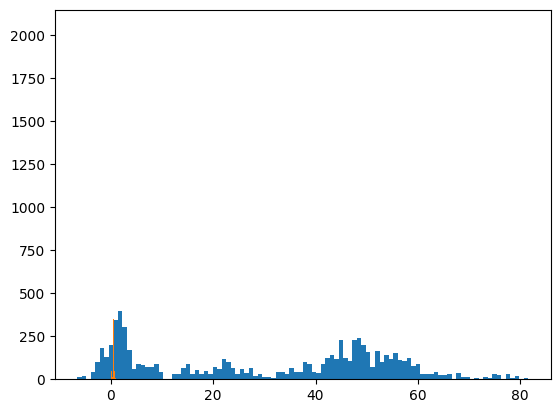

In [67]:
#predict the test data
pred = nn_model.predict(X_test_re)
#convert the predicted data back to a dataframe
pred_df = pd.DataFrame(pred.reshape(pred.shape[0], pred.shape[1]), columns=X_test.columns + '_pred')
#convert the test data back to a dataframe
X_test_df = pd.DataFrame(X_test_re.reshape(X_test_re.shape[0], X_test_re.shape[1]), columns=X_test.columns)
#plot a histogram of the third column of predicted data and the test data
plt.hist(pred_df.iloc[:,2], bins=100)
plt.hist(X_test_df.iloc[:,2], bins=100)
plt.show()



